In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn import decomposition
from numpy import genfromtxt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Function Part

In [3]:
def PCAdata(file, accuracy):
    df = pd.read_csv(file, index_col = 0)
    y = df.Life_expectancy
    X = df.drop('Life_expectancy', axis=1)   
    pca = PCA()
    pca.fit(X)
    num = 0
    count1 = 0
    countlist = []
    valuelist = []
    
    for i in range(len(pca.explained_variance_ratio_)):
        num += pca.explained_variance_ratio_[i]
        count1 += 1
        if num >= accuracy: 
            break

    num = 0
    count = 1
    for i in range(len(pca.explained_variance_ratio_)):
        num += pca.explained_variance_ratio_[i]
        valuelist.append(num)
        countlist.append(count)
        count +=1
    return count1, valuelist, countlist

In [4]:
def PCCreate(count1, file):
    df = pd.read_csv(file, index_col = 0)
    y = df.Life_expectancy
    X = df.drop('Life_expectancy', axis=1)   
    pca = PCA()
    pca.fit(X)
    pca = decomposition.PCA(n_components=count1)
    pc = pca.fit_transform(X)    
    y = y.to_numpy()
    return pc,y

In [5]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

# Linear Regression Part

## Train data Part

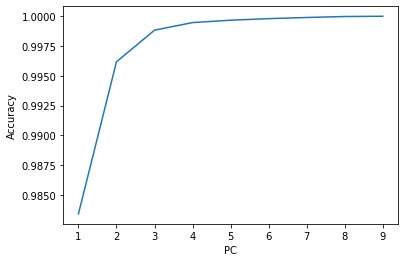

When PC >= 2 accuracy is more than 0.99.


In [6]:
PCnum, Accuracy, x_axis = PCAdata('Train.csv', 0.99)
plt.plot(x_axis,Accuracy)
plt.xlabel('PC') 
plt.ylabel('Accuracy')
plt.show()
print('When PC >=',PCnum, 'accuracy is more than 0.99.')

In [7]:
TrainX, Trainy = PCCreate(PCnum, 'Train.csv')
reg = LinearRegression().fit(TrainX, Trainy)
Predict = reg.predict(TrainX)
coef1 = reg.coef_[0]
coef2 = reg.coef_[1]
intercept = reg.intercept_ 
print('Expectancy Life =',coef1,'* PC1 +',coef2,'* PC2 +',intercept)

Expectancy Life = -0.0029130327956725603 * PC1 + -0.05083398674966634 * PC2 + 80.03534743202417


In [8]:
PC1 = []
PC2 = []
for i in TrainX:
    PC1.append(i[0])
    PC2.append(i[1])
PC1 = np.asarray(PC1)
PC2 = np.asarray(PC2)

Red - Original Points, Blue - Predict Plat


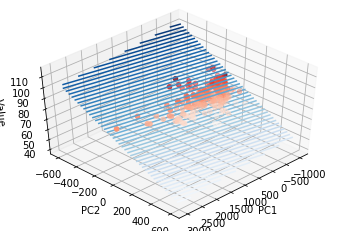

In [9]:
def f(X,Y):
    return coef1 * X + coef2 *Y + intercept

x = np.linspace(-1000, 3000, 30)
y = np.linspace(-600, 600, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
zdata = Trainy
xdata = PC1
ydata = PC2

ax = plt.axes(projection='3d')
ax.view_init(45, 45)
ax.contour3D(X, Y, Z, 50, cmap='Blues')
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Value')


print('Red - Original Points, Blue - Predict Plat')

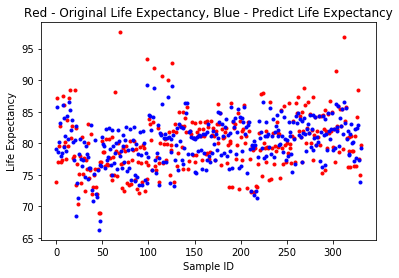

In [10]:
PCAerrorlist, PCA_abs_errorlist = errorCalculate(Trainy,Predict)
plt.plot(Trainy, 'r.')
plt.plot(Predict, 'b.')

plt.title('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.xlabel('Sample ID')
plt.ylabel('Life Expectancy')
plt.show()
np.savetxt("LR_Train_P.csv", Predict.transpose(), delimiter=",")

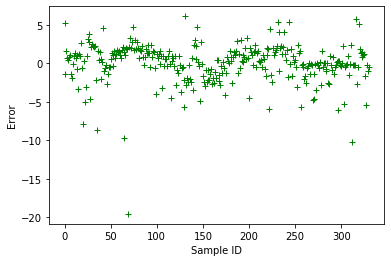

DescribeResult(nobs=331, minmax=(0.003115726164551802, 19.540983948385815), mean=1.7300637355753743, variance=3.4397159513051725, skewness=3.8716203198050496, kurtosis=27.292822549687227)

In [11]:
PCAerrorlist, PCA_abs_errorlist = errorCalculate(Trainy,Predict)
plt.plot(PCAerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(PCA_abs_errorlist)

## Test data Part

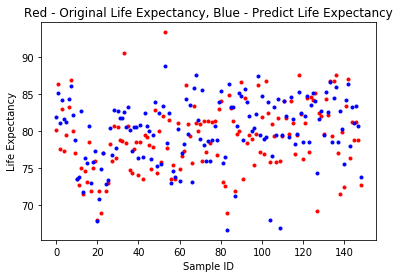

In [12]:
TestX, Testy = PCCreate(PCnum, 'Test.csv')
Predict = reg.predict(TestX)
plt.plot(Testy, 'r.')
plt.plot(Predict, 'b.')
plt.title('Red - Original Life Expectancy, Blue - Predict Life Expectancy')
plt.xlabel('Sample ID')
plt.ylabel('Life Expectancy')
np.savetxt("LR_Test_P.csv", Predict.transpose(), delimiter=",")
plt.show()

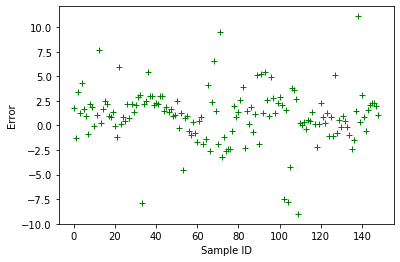

DescribeResult(nobs=149, minmax=(0.01327125366928783, 11.101328049017667), mean=2.136004986611961, variance=3.899073172128855, skewness=2.0251075699134335, kurtosis=4.690222653087081)

In [13]:
PCAerrorlist, PCA_abs_errorlist = errorCalculate(Testy,Predict)
plt.plot(PCAerrorlist,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(PCA_abs_errorlist)